In [65]:
import numpy as np
import pandas as pd
import statsmodels.api as sp
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans


sb.set()

In [66]:
data = pd.read_csv('Training_Data.csv')
df = data.drop(['Profession','Id','CITY','STATE','CURRENT_JOB_YRS'],axis = 1)
df['Married/Single'] = df['Married/Single'].map({'single':0,'married':1})
df['House_Ownership'] = df['House_Ownership'].map({'rented':1,'norent_noown':1})
df['Car_Ownership'] = df['Car_Ownership'].map({'no':0,'yes':1})
dat = df.copy()
dat.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,0,1.0,0,13,0
1,7574516,40,10,0,1.0,0,13,0
2,3991815,66,4,1,1.0,0,10,0
3,6256451,41,2,0,1.0,1,12,1
4,5768871,47,11,0,1.0,0,14,1


In [69]:
totalnull = df.isnull().sum()
totalnull

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [68]:
df['House_Ownership'] = df['House_Ownership'].fillna(df['House_Ownership'].dropna().mode().values[0])
df['Car_Ownership'] = df['Car_Ownership'].fillna(df['Car_Ownership'].dropna().mode().values[0])
df['CURRENT_HOUSE_YRS'] = df['CURRENT_HOUSE_YRS'].fillna(df['CURRENT_HOUSE_YRS'].dropna().mode().values[0])
df['Risk_Flag'] = df['Risk_Flag'].fillna(df['Risk_Flag'].dropna().mode().values[0])

In [70]:
dat = df.copy()
x = df.iloc[:,0:7]
x.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_HOUSE_YRS
0,1303834,23,3,0,1.0,0,13
1,7574516,40,10,0,1.0,0,13
2,3991815,66,4,1,1.0,0,10
3,6256451,41,2,0,1.0,1,12
4,5768871,47,11,0,1.0,0,14


In [71]:
cluster = KMeans(2)
cluster.fit(x)
clum = cluster.fit_predict(x)
df['Cluster'] = clum
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_HOUSE_YRS,Risk_Flag,Cluster
0,1303834,23,3,0,1.0,0,13,0,0
1,7574516,40,10,0,1.0,0,13,0,1
2,3991815,66,4,1,1.0,0,10,0,0
3,6256451,41,2,0,1.0,1,12,1,1
4,5768871,47,11,0,1.0,0,14,1,1


Text(0, 0.5, 'Experience')

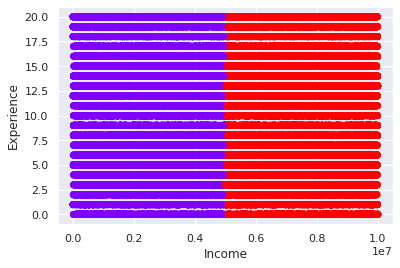

In [72]:
plt.scatter(df['Income'],df['Experience'],c = df['Cluster'],cmap = 'rainbow')
plt.xlabel('Income')
plt.ylabel('Experience')

Text(0, 0.5, 'WCSS')

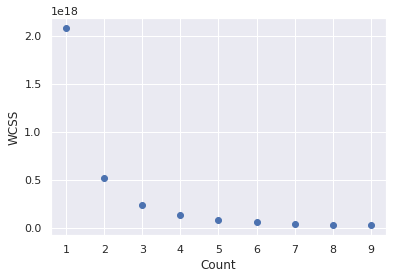

In [73]:
WCSS = []
count = []
for i in range(1,10):
 clust = KMeans(i)
 clust.fit(x)
 WCSS.append(clust.inertia_)
 count.append(i)

Elbow = pd.DataFrame()
Elbow['WCSS'] = WCSS
Elbow['Count'] = count
plt.scatter(Elbow['Count'],Elbow['WCSS'])
plt.xlabel('Count')
plt.ylabel('WCSS')

In [74]:
df_copy = dat.copy()
Clust_copy = KMeans(3)
Clust_copy.fit(x)
m = Clust_copy.fit_predict(x)
df_copy['Approval Status'] = m

Text(0, 0.5, 'EXPERIENCE')

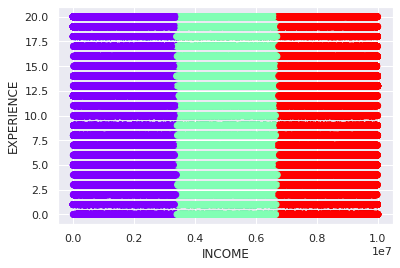

In [75]:
plt.scatter(df_copy['Income'],df_copy['Experience'],c = df_copy['Approval Status'], cmap = 'rainbow')
plt.xlabel('INCOME')
plt.ylabel('EXPERIENCE')

In [76]:
df_copy.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_HOUSE_YRS,Risk_Flag,Approval Status
0,1303834,23,3,0,1.0,0,13,0,0
1,7574516,40,10,0,1.0,0,13,0,2
2,3991815,66,4,1,1.0,0,10,0,1
3,6256451,41,2,0,1.0,1,12,1,1
4,5768871,47,11,0,1.0,0,14,1,1


In [77]:
df_copy['Approval Status'] = df_copy['Approval Status'].map({0:'Not Approved',1:'Provisional',2:'Approved'})
df_copy

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_HOUSE_YRS,Risk_Flag,Approval Status
0,1303834,23,3,0,1.0,0,13,0,Not Approved
1,7574516,40,10,0,1.0,0,13,0,Approved
2,3991815,66,4,1,1.0,0,10,0,Provisional
3,6256451,41,2,0,1.0,1,12,1,Provisional
4,5768871,47,11,0,1.0,0,14,1,Provisional
...,...,...,...,...,...,...,...,...,...
251994,8154883,43,13,0,1.0,0,11,0,Approved
251995,2843572,26,10,0,1.0,0,11,0,Not Approved
251996,4522448,46,7,0,1.0,0,12,0,Provisional
251997,6507128,45,0,0,1.0,0,10,0,Provisional
